In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Thực hành: Food Price in Turkey

In [ ]:
# Đọc dữ liệu
df = pd.read_csv("FoodPrice_in_Turkey.csv")
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


Giá gạo ở National Average và thời gian có mối liên hệ với nhau hay không


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


In [ ]:
# giá gạo ở National Average
price_rice = df[(df['ProductName'] == 'Rice - Retail') & (df['Place'] == 'National Average')]
price_rice

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099
...,...,...,...,...,...,...,...,...
61,National Average,52,Rice - Retail,5,KG,8,2019,9.4681
62,National Average,52,Rice - Retail,5,KG,9,2019,9.5000
63,National Average,52,Rice - Retail,5,KG,10,2019,9.4346
64,National Average,52,Rice - Retail,5,KG,11,2019,9.4267


In [ ]:
# thời gian (Tháng/Năm)
price_rice['month-year']=pd.to_datetime(price_rice['Month'].astype(str) + '/' + price_rice['Year'].astype(str))

<ipython-input-11-9ee016ddce63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_rice['month-year']=pd.to_datetime(price_rice['Month'].astype(str) + '/' + price_rice['Year'].astype(str))


In [ ]:
price_rice

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price,month-year
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920,2013-05-01
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786,2013-06-01
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865,2013-11-01
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337,2013-12-01
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099,2014-01-01
...,...,...,...,...,...,...,...,...,...
61,National Average,52,Rice - Retail,5,KG,8,2019,9.4681,2019-08-01
62,National Average,52,Rice - Retail,5,KG,9,2019,9.5000,2019-09-01
63,National Average,52,Rice - Retail,5,KG,10,2019,9.4346,2019-10-01
64,National Average,52,Rice - Retail,5,KG,11,2019,9.4267,2019-11-01


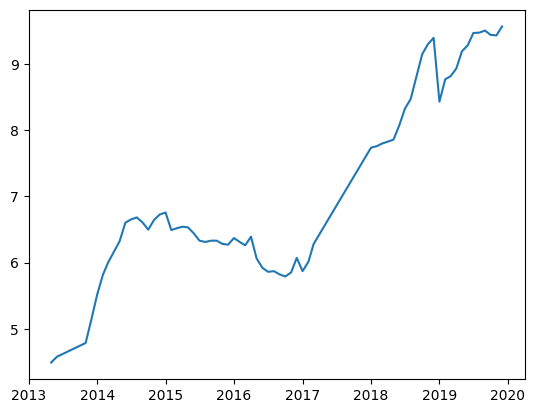

In [ ]:
# trực quan hoá
plt.plot(price_rice['month-year'], price_rice['Price'])

In [ ]:
# Kiểm định giả thuyết: có tương quan không? chỉ số tương quan = 0 là không tương quan
# H0: r=0
# H1: r khác 0

In [ ]:
# đặt mốc 1/2013: gốc
# time_processed = month + (year-2013)*12

In [ ]:
price_rice['time_processed'] = price_rice['Month'] + (price_rice['Year']-2013)*12
price_rice

<ipython-input-17-965b35512fa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_rice['time_processed'] = price_rice['Month'] + (price_rice['Year']-2013)*12


,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price,month-year,time_processed
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920,2013-05-01,5
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786,2013-06-01,6
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865,2013-11-01,11
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337,2013-12-01,12
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099,2014-01-01,13
...,...,...,...,...,...,...,...,...,...,...
61,National Average,52,Rice - Retail,5,KG,8,2019,9.4681,2019-08-01,80
62,National Average,52,Rice - Retail,5,KG,9,2019,9.5000,2019-09-01,81
63,National Average,52,Rice - Retail,5,KG,10,2019,9.4346,2019-10-01,82
64,National Average,52,Rice - Retail,5,KG,11,2019,9.4267,2019-11-01,83


In [ ]:
stats.pearsonr(price_rice['time_processed'], price_rice['Price'])

# tương quan giữa 2 biến định lượng: Pearson

PearsonRResult(statistic=0.8836736355854856, pvalue=8.93132627685311e-23)

In [ ]:
# p_value = 0.00000000000000 < 0.05
# -> bác bỏ H0 (Null Hypothesis -> không có tương quan)
# -> có tương quan

# Kiểm định tương quan trên bộ dữ liệu shopeep_koreantop_clothing_shop_data

Bộ dữ liệu shopeep_koreantop_clothing_shop_data.csv chứa thông tin thống kê của trang thương mại điện tử Shopeep tại Philipin về thị trường kinh doanh thời trang theo phong cách hàn quốc tại philipin. Với mức ý nghĩa 5% hãy thực hiện các kiểm định sau:

- Giữa rating_star và follower_count có tương quan với nhau hay không

- Giữa rating_star và số lượng sản phẩm (item_count) có tương quan với nhau hay không

- Giữa is_shopee_verified và việc có cửa hàng trưng bày (is_official_shop) có tương quan với nhau hay không

In [ ]:
df = pd.read_csv('/content/shopeep_koreantop_clothing_shop_data.csv')

In [ ]:
df.head()

,pk_shop,date_collected,shopid,name,join_month,join_day,join_year,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
0,20210613254711738,2021-06-13,254711738,hello.may.ph,April,27,2020,446,17487,10:13:55,96,NaN,181,17510,729,4.81,1,0
1,20210613314198143,2021-06-13,314198143,love.women.shop,September,25,2020,263,8574,10:43:05,73,"San Nicolas,Metro Manila",78,2656,198,4.68,0,0
2,2021061310377223,2021-06-13,10377223,R&O RedOrange,September,27,2016,209,660417,08:32:07,90,"Pasay City,Metro Manila",4647,1071829,18073,4.91,1,0
3,2021061321407329,2021-06-13,21407329,patriciacai,April,30,2017,165,18787,09:10:38,94,"Binondo,Metro Manila",44,18959,215,4.94,1,0
4,2021061311187885,2021-06-13,11187885,Little Market Manila,October,18,2016,467,67371,11:40:59,89,"Caloocan City,Metro Manila",680,39252,2383,4.73,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pk_shop             746 non-null    int64  
 1   date_collected      746 non-null    object 
 2   shopid              746 non-null    int64  
 3   name                746 non-null    object 
 4   join_month          746 non-null    object 
 5   join_day            746 non-null    int64  
 6   join_year           746 non-null    int64  
 7   item_count          746 non-null    int64  
 8   follower_count      746 non-null    int64  
 9   response_time       746 non-null    object 
 10  response_rate       746 non-null    int64  
 11  shop_location       428 non-null    object 
 12  rating_bad          746 non-null    int64  
 13  rating_good         746 non-null    int64  
 14  rating_normal       746 non-null    int64  
 15  rating_star         740 non-null    float64
 16  is_shope

In [ ]:
# Kiểm định tương quan giữa rating_star và follower_count
df_rating_follower = df[['rating_star', 'follower_count']].dropna()
corr_coefficient, p_value = stats.pearsonr(df_rating_follower['rating_star'], df_rating_follower['follower_count'])
print("Tương quan giữa rating_star và follower_count:")
print("Correlation:", corr_coefficient)
print("p-value:", p_value)

Tương quan giữa rating_star và follower_count:
Correlation: 0.02749005984630104
p-value: 0.45525226763254123


In [ ]:
# Không đủ cơ sở để reject H0
# Không đủ cơ sở để có thể khẳng định có tương quan giữa rating_star và follower_count

In [ ]:
# Giữa rating_star và số lượng sản phẩm (item_count) có tương quan với nhau hay không
df_rating_item = df[['rating_star', 'item_count']].dropna()
corr_coefficient, p_value = stats.pearsonr(df_rating_item['rating_star'], df_rating_item['item_count'])
print("Tương quan giữa rating_star và item_count:")
print("Correlation:", corr_coefficient)
print("p-value:", p_value)

Tương quan giữa rating_star và item_count:
Correlation: -0.03732626070920735
p-value: 0.3105727616062414


In [ ]:
# Không đủ cơ để chứng minh tương quan giữa rating_star và số lượng sản phẩm

Giữa is_shopee_verified và việc có cửa hàng trưng bày (is_official_shop)

In [ ]:
df1 = df[["is_shopee_verified", "is_official_shop"]]
df1 = df1.dropna()
print(stats.pearsonr(df1.is_shopee_verified, df1.is_official_shop))

PearsonRResult(statistic=-0.044589009043606104, pvalue=0.22382403995777894)


In [ ]:
# không đủ cơ sở để chứng minh tương quan